**Librerias**

*Selección e importación:* las librerias seleccionadas e importadas a continuación son las necesarias para realizar un análisis exploratorio del DataFrame "Peliculas".

In [1]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from scipy import stats
from sklearn.preprocessing import LabelEncoder

**Análisis exploratorio de datos**

*Caracterización del DataFrame:* Para realizar la caracterización del DataFrame se determinó cantidad de filas y columnas, nombre de las columnas y tipos de variables.

In [2]:
df = pd.read_csv('Movie_Data_File2.csv')

In [3]:
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


In [4]:
#Cantidad de filas y columnas
df.shape

(10002, 29)

In [5]:
#Nombre de las columnas y tipos de variables
df.dtypes

Film_title            object
Release_year         float64
Director              object
Cast                  object
Average_rating       float64
Owner_rating         float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Spoken_languages      object
Description           object
Studios               object
Watches                int64
List_appearances       int64
Likes                  int64
Fans                   int64
½                      int64
★                      int64
★½                     int64
★★                     int64
★★½                    int64
★★★                    int64
★★★½                   int64
★★★★                   int64
★★★★½                  int64
★★★★★                  int64
Total_ratings          int64
Film_URL              object
dtype: object

**Analisis de variables categoricas**

*Cast*

Eliminar datos de la columna Cast, dejando solamente los dos primeros actores

In [6]:
def extraer_dos_actores(cadena):
    if isinstance(cadena, str):
        actores = [actor.strip() for actor in cadena.split(',')]
        return pd.Series(actores[:2]) 
    return pd.Series([None, None]) 

df[['Protagonista', 'Coprotagonista']] = df['Cast'].apply(extraer_dos_actores)
df.drop(columns=['Cast'], inplace=True)


In [7]:
print(df[['Protagonista', 'Coprotagonista']].head())

          Protagonista        Coprotagonista
0  ['Désirée Nosbusch'        'Bodo Staiger'
1         ['Tom Hardy'     'Charlize Theron'
2    ['Jessica Harper'     'Stefania Casini'
3       ['Bill Murray'  'Scarlett Johansson'
4      ['Mitsuo Iwata'       'Nozomu Sasaki'


Observamos que hay Protagonistas repetidos, por lo tanto procederemos a unificarlos

In [8]:
df['Protagonista'] = df['Protagonista'].astype(str)  

df['Protagonista'] = df['Protagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Protagonista'] = df['Protagonista'].str.strip()

df['Protagonista'] = df['Protagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Haremos lo mismo con los coprotagonistas

In [9]:
df['Coprotagonista'] = df['Coprotagonista'].astype(str)  

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Coprotagonista'] = df['Coprotagonista'].str.strip()

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Realizamos el conteo

In [10]:
conteo_Protagonista = df['Protagonista'].value_counts()
print(conteo_Protagonista)

Protagonista
None                 57
Mel Blanc            49
Nicolas Cage         36
Sean Connery         33
Johnny Depp          33
                     ..
Madonna               1
Jonathan Lipnicki     1
Martina Gedeck        1
Halina Reijn          1
Olivia Wilde          1
Name: count, Length: 5064, dtype: int64


In [11]:
conteo_Coprotagonista = df['Coprotagonista'].value_counts()
print(conteo_Coprotagonista)

Coprotagonista
nan                 86
None                57
Tommy Lee Jones     14
Robert De Niro      14
Rose Byrne          13
                    ..
Kristen Connolly     1
Josefine Preuß       1
Aylin Tezel          1
Julia Koschitz       1
Allison Williams     1
Name: count, Length: 6284, dtype: int64


*Genres*

Eliminar datos de la columna Genres, dejando solamente el primero

In [12]:
def extraer_primer_genero(cadena):
    if isinstance(cadena, str):
        generos = [g.strip() for g in cadena.split(',')]
        return generos[0] if generos else ''
    return ''
df['Genres'] = df['Genres'].apply(extraer_primer_genero)

In [13]:
print(df[['Genres']].head())

         Genres
0     ['Horror'
1  ['Adventure'
2    ['Horror']
3      ['Drama'
4  ['Animation'


Observamos que hay generos repetidos, por lo tanto procederemos a unificarlos

In [14]:
df['Genres'] = df['Genres'].astype(str)  

df['Genres'] = df['Genres'].str.replace(r"[\[\]']", "", regex=True)

df['Genres'] = df['Genres'].str.strip()

df['Genres'] = df['Genres'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que no hay valores repetidos

In [15]:
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes' '']


Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga. 

In [16]:
conteo = (df['Genres'] == '').sum()
print(conteo)

24


In [17]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Genres'] = df['Genres'].str.strip()
df = df[df['Genres'] != '']

In [18]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes']


Realizamos el conteo

In [19]:
conteo_Genres = df['Genres'].value_counts()
print(conteo_Genres)

Genres
Drama              2232
Comedy             1423
Horror              867
Thriller            802
Action              734
Crime               529
Romance             504
Science Fiction     443
Adventure           421
Documentary         338
Fantasy             333
Mystery             261
Animation           231
Family              219
History             164
Western             159
War                 129
Music               118
TV Movie             69
Epic heroes           2
Name: count, dtype: int64


*Countries*

Eliminar datos de la columna Countries, dejando solamente el primero

In [20]:
def extraer_primer_pais(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Countries'] = df['Countries'].apply(extraer_primer_pais)


In [21]:
print(df[['Countries']].head())

      Countries
0   ['Germany']
1  ['Australia'
2     ['Italy']
3         ['UK'
4     ['Japan']


In [22]:
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
["['Germany']" "['Australia'" "['Italy']" "['UK'" "['Japan']" "['Germany'"
 "['USA']" "['UK']" "['France'" "['Ireland'" "['USA'" "['Belgium'"
 "['Mexico'" "['Czechoslovakia'" "['Mexico']" "['South Korea'"
 "['France']" "['New Zealand'" "['Italy'" "['Hong Kong']"
 "['South Korea']" "['Canada'" "['Canada']" "['China'" "['USSR']"
 "['Denmark'" "['Japan'" "['Austria']" "['Australia']" "['Sweden']"
 "['Spain']" "['India'" "['Brazil'" "['Sweden'" "['Switzerland'"
 "['Netherlands']" "['Spain'" "['Netherlands'" "['Poland']" "['Czechia'"
 "['Hong Kong'" "['New Zealand']" "['Slovakia'" "['Bulgaria'" "['Hungary'"
 '' "['USSR'" "['Austria'" "['Russia'" "['Iceland'" "['Turkey'"
 "['United Arab Emirates'" "['South Africa'" "['Thailand'" "['Greece']"
 "['Greece'" "['Poland'" "['Norway']" "['Argentina'" "['Indonesia']"
 "['Philippines'" "['Colombia'" "['Czechoslovakia']" "['Russia']"
 "['Indonesia'" "['Ireland']" "['Chile'" "['Turkey']" "['Romania'"
 "['India

Observamos que hay paises repetidos, por lo tanto procederemos a unificarlos

In [23]:
df['Countries'] = df['Countries'].astype(str)  

df['Countries'] = df['Countries'].str.replace(r"[\[\]']", "", regex=True)

df['Countries'] = df['Countries'].str.strip()

df['Countries'] = df['Countries'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que ya no haya valores repetidos

In [24]:
df['Countries'].unique()

array(['Germany', 'Australia', 'Italy', 'UK', 'Japan', 'USA', 'France',
       'Ireland', 'Belgium', 'Mexico', 'Czechoslovakia', 'South Korea',
       'New Zealand', 'Hong Kong', 'Canada', 'China', 'USSR', 'Denmark',
       'Austria', 'Sweden', 'Spain', 'India', 'Brazil', 'Switzerland',
       'Netherlands', 'Poland', 'Czechia', 'Slovakia', 'Bulgaria',
       'Hungary', '', 'Russia', 'Iceland', 'Turkey',
       'United Arab Emirates', 'South Africa', 'Thailand', 'Greece',
       'Norway', 'Argentina', 'Indonesia', 'Philippines', 'Colombia',
       'Chile', 'Romania', 'Singapore', 'Israel', 'Cross Country',
       'Ukraine', 'Dominican Republic', 'Libya', 'Iraq', 'Bolivia',
       'Lithuania', 'Malaysia', 'Finland', 'Luxembourg', 'Taiwan',
       'Syrian Arab Republic', 'Ivory Coast', 'Country Club', 'Bahamas',
       'Cuba', 'Jamaica', 'Iran', 'Bosnia and Herzegovina',
       'Burkina Faso', 'Nepal', 'Serbia', 'Portugal', 'Aruba', 'Ecuador',
       'Panama', 'Estonia', 'Uganda', 'Jorda

Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga.

Primero veremos cuantas filas contienen ' '

In [25]:
conteo = (df['Countries'] == '').sum()
print(conteo)

105


In [26]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Countries'] = df['Countries'].str.strip()
df = df[df['Countries'] != '']

In [27]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
['Germany' 'Australia' 'Italy' 'UK' 'Japan' 'USA' 'France' 'Ireland'
 'Belgium' 'Mexico' 'Czechoslovakia' 'South Korea' 'New Zealand'
 'Hong Kong' 'Canada' 'China' 'USSR' 'Denmark' 'Austria' 'Sweden' 'Spain'
 'India' 'Brazil' 'Switzerland' 'Netherlands' 'Poland' 'Czechia'
 'Slovakia' 'Bulgaria' 'Hungary' 'Russia' 'Iceland' 'Turkey'
 'United Arab Emirates' 'South Africa' 'Thailand' 'Greece' 'Norway'
 'Argentina' 'Indonesia' 'Philippines' 'Colombia' 'Chile' 'Romania'
 'Singapore' 'Israel' 'Cross Country' 'Ukraine' 'Dominican Republic'
 'Libya' 'Iraq' 'Bolivia' 'Lithuania' 'Malaysia' 'Finland' 'Luxembourg'
 'Taiwan' 'Syrian Arab Republic' 'Ivory Coast' 'Country Club' 'Bahamas'
 'Cuba' 'Jamaica' 'Iran' 'Bosnia and Herzegovina' 'Burkina Faso' 'Nepal'
 'Serbia' 'Portugal' 'Aruba' 'Ecuador' 'Panama' 'Estonia' 'Uganda'
 'Jordan' 'Pakistan' 'Nigeria' 'Yugoslavia' 'Malawi' 'Ghana' 'Lebanon'
 'Peru' 'Albania' 'Egypt' 'Netherlands Antilles' 'Mongolia' 'Be

Realizamos el conteo

In [28]:
conteo_Countries = df['Countries'].value_counts()
print(conteo_Countries)

Countries
USA                                  5636
UK                                    863
France                                525
Italy                                 373
Canada                                354
                                     ... 
Netherlands Antilles                    1
Mongolia                                1
Benin                                   1
"Lao Peoples Democratic Republic"       1
Morocco                                 1
Name: count, Length: 90, dtype: int64


*Studios*

Eliminar datos de la columna Studios, dejando solamente el primero

In [29]:
def extraer_primer_productor(cadena):
    if isinstance(cadena, str):
        productor = [g.strip() for g in cadena.split(',')]
        return productor [0] if productor else ''
    return ''
df['Studios'] = df['Studios'].apply(extraer_primer_productor)

In [30]:
print(df[['Studios']].head())

                       Studios
0  ['Barbara Moorse Workshop']
1     ['Warner Bros. Pictures'
2          ['Seda Spettacoli']
3         ['American Zoetrope'
4                       ['MBS'


Eliminamos los Studios repetidos y verificamos que se hayan realizado los cambios con exito.

In [31]:
df['Studios'] = df['Studios'].astype(str)  

df['Studios'] = df['Studios'].str.replace(r"[\[\]']", "", regex=True)

df['Studios'] = df['Studios'].str.strip()

df['Studios'] = df['Studios'].str.replace(r"\s*,\s*", ", ", regex=True)

In [32]:
conteo_Studios = df['Studios'].value_counts()
print(conteo_Studios)

Studios
Paramount Pictures           303
Universal Pictures           249
                             222
Columbia Pictures            217
Warner Bros. Pictures        203
                            ... 
Futura Films                   1
C.A.P.A.C.                     1
Carlton Film Export            1
Films Jean Alexandre           1
Testa Gay Cinematografica      1
Name: count, Length: 4522, dtype: int64


*Director*

Eliminar datos de la columna Director, dejando solamente el primero

In [33]:
def extraer_primer_director(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Director'] = df['Director'].apply(extraer_primer_pais)

In [34]:
conteo_directores = df['Director'].value_counts()
print(conteo_directores)

Director
Chuck Jones           54
Cirio H. Santiago     41
Antonio Margheriti    39
William Witney        33
Steven Spielberg      31
                      ..
Yuval Adler            1
Ali Selim              1
Jean Negulesco         1
Clement Virgo          1
Kazuo Komizu           1
Name: count, Length: 4473, dtype: int64


**Columnas**

*Creación de nueva variable*

Variable Porcentje_Likes

In [35]:
df['Porcentaje_likes'] = (df['Likes'] / df['Watches'])*100
print(df.columns)

Index(['Film_title', 'Release_year', 'Director', 'Average_rating',
       'Owner_rating', 'Genres', 'Runtime', 'Countries', 'Original_language',
       'Spoken_languages', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', '½', '★', '★½', '★★', '★★½', '★★★',
       '★★★½', '★★★★', '★★★★½', '★★★★★', 'Total_ratings', 'Film_URL',
       'Protagonista', 'Coprotagonista', 'Porcentaje_likes'],
      dtype='object')


*Eliminación de columnas*

Eliminamos las columnas que no utilizaremos para aplicar el modelo de aprendizaje supervisado, ya sea porque no son objeto de nuestro analisis o porque repiten información.

In [36]:
#Eliminación de columnas: Release_year por tener totalidad de datos faltantes y el resto de la columnas por no contener información necesaria para nuestro análisis
df = df.drop(columns=['Release_year', 'Owner_rating' , 'Spoken_languages', 'List_appearances', 'Fans', 'Likes' ,  '½' , '★' , '★½' , '★★' , '★★½' , '★★★' , '★★★½' , '★★★★' , '★★★★½' , '★★★★★','Film_URL'])

In [37]:
#Comprobamos la eliminación de las columnas no deseadas
df.shape
df.dtypes

Film_title            object
Director              object
Average_rating       float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Description           object
Studios               object
Watches                int64
Total_ratings          int64
Protagonista          object
Coprotagonista        object
Porcentaje_likes     float64
dtype: object

*Traducción del nombre de las columnas*

In [38]:
#Cambio del nombre de las columnas 
df = df.rename(columns={'Film_title' : 'Titulo' , 'Average_rating' : 'Calificación_promedio', 'Genres' : 'Genero', 'Runtime' : 'Duración' , 'Countries' : 'Pais' , 'Original_language' : 'Lenguaje' , 'Description' : 'Descripción' , 'Studios' : 'Productora' , 'Watches' : 'Vistas', 'Total_ratings': 'Ratings'})
print(df.columns)

Index(['Titulo', 'Director', 'Calificación_promedio', 'Genero', 'Duración',
       'Pais', 'Lenguaje', 'Descripción', 'Productora', 'Vistas', 'Ratings',
       'Protagonista', 'Coprotagonista', 'Porcentaje_likes'],
      dtype='object')


**Valores faltantes**

*Identificacion de valores faltantes y manejo* 

In [39]:
#Identificación de valores faltantes
df.isnull().sum()

Titulo                     0
Director                   0
Calificación_promedio    522
Genero                     0
Duración                   8
Pais                       0
Lenguaje                   0
Descripción                2
Productora                 0
Vistas                     0
Ratings                    0
Protagonista               0
Coprotagonista             0
Porcentaje_likes           0
dtype: int64

Obtenemos % de datos faltantes numericos para definir el manejo de los mismos

In [40]:
masnan = df.isnull().sum().max()
filas_total= len(df)
resultado1 = (masnan / filas_total) * 100
print(f"El porcentaje máximo de valores nulos por columna es igual a {resultado1:.2f} %")

El porcentaje máximo de valores nulos por columna es igual a 5.29 %


La falta de datos numéricos es aleatoria y por lo tanto los manejaremos a través de la *Imputación Simple* utilizando la media, ya que con la *Eliminación de filas* perderíamos infrmación importante contenida en el resto de las columnas de la misma fila. Por otra parte, al ser bajo el % de datos faltantes respecto a la totalidad, la Imputación no cambiara la distribución de nuestros datos.

Se utiliza SimpleImputer(strategy='mean') para completar Calificación_promedio y Duración.

In [41]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Calificación_promedio']=imp.fit_transform(df[['Calificación_promedio']])

In [42]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Duración']=imp.fit_transform(df[['Duración']])

In [43]:
#Compruebo que la imputación de los datos numéricos se realizó con exito
df.isnull().sum()

Titulo                   0
Director                 0
Calificación_promedio    0
Genero                   0
Duración                 0
Pais                     0
Lenguaje                 0
Descripción              2
Productora               0
Vistas                   0
Ratings                  0
Protagonista             0
Coprotagonista           0
Porcentaje_likes         0
dtype: int64

Eliminación de datos faltantes categóricos

In [44]:
df = df.dropna(subset=['Descripción'], axis=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9871 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Titulo                 9871 non-null   object 
 1   Director               9871 non-null   object 
 2   Calificación_promedio  9871 non-null   float64
 3   Genero                 9871 non-null   object 
 4   Duración               9871 non-null   float64
 5   Pais                   9871 non-null   object 
 6   Lenguaje               9871 non-null   object 
 7   Descripción            9871 non-null   object 
 8   Productora             9871 non-null   object 
 9   Vistas                 9871 non-null   int64  
 10  Ratings                9871 non-null   int64  
 11  Protagonista           9871 non-null   object 
 12  Coprotagonista         9871 non-null   object 
 13  Porcentaje_likes       9871 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


**Outliers**

*Identificacion de Outliers y manejo*

Identificamos que variables contienen valores numericos

In [45]:
print(df.select_dtypes(include=['number']).columns)

Index(['Calificación_promedio', 'Duración', 'Vistas', 'Ratings',
       'Porcentaje_likes'],
      dtype='object')


Visualización de distribución y valores extremos para luego seleccionar la estrategia de manejo.

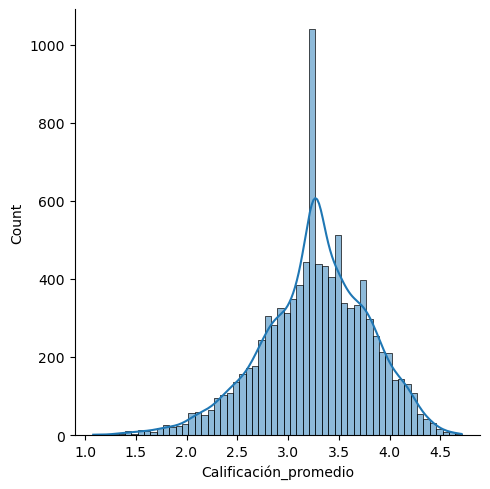

In [46]:
sns.displot(df['Calificación_promedio'], kde=True) 
sns.despine() 

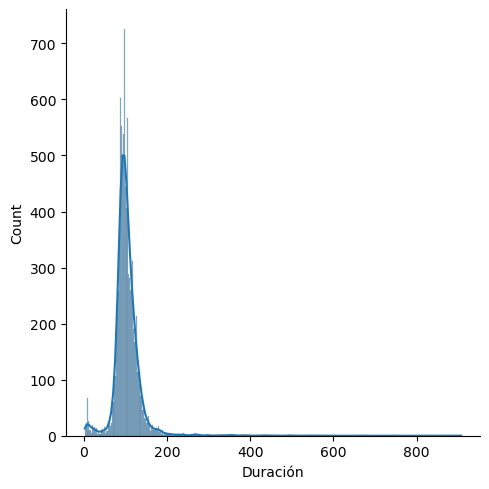

In [47]:
sns.displot(df['Duración'], kde=True) 
sns.despine() 

Debido a que las variables Calificación promedio y Duración presentan distribución normal utilizaremos zscore para detectar outliers

*Calificación_promedio*

In [48]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Calificación_promedio'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Calificación_promedio', 'zscore']])

Cantidad de outliers encontrados: 54
      Calificación_promedio    zscore
157                    1.49 -3.370698
650                    1.57 -3.219093
1050                   1.66 -3.048536
1100                   1.65 -3.067487
1172                   1.68 -3.010635
1705                   1.35 -3.636009
1827                   1.43 -3.484403
1993                   1.56 -3.238043
2506                   1.28 -3.768664
2575                   1.49 -3.370698
2935                   1.53 -3.294896
3215                   1.63 -3.105388
3220                   1.11 -4.090826
3221                   1.40 -3.541255
3222                   1.54 -3.275945
3223                   1.57 -3.219093
3227                   1.62 -3.124339
3812                   1.34 -3.654959
4176                   1.24 -3.844467
4178                   1.29 -3.749713
4333                   1.60 -3.162240
4366                   1.44 -3.465452
4367                   1.68 -3.010635
4531                   1.52 -3.313846
4652         

In [49]:
print("Valor mínimo:", df['Calificación_promedio'].min())
print("Valor máximo:", df['Calificación_promedio'].max())

Valor mínimo: 1.08
Valor máximo: 4.71


La calificación promedio tiene un rango de 1 a 5 por lo tanto los valores que estadisticamente son identificados como outliers, son calificaciones promedio bajas pero se encuntran dentro del rango que podria recibir una pelicula, por lo tanto dichos valores seran conservados.

*Duración*

In [50]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 105
      Duración     zscore
12       228.0   3.297172
145      233.0   3.429602
369      467.0   9.627332
717      379.0   7.296562
889      316.0   5.627942
...        ...        ...
9908     600.0  13.149973
9909     300.0   5.204166
9916     585.0  12.752683
9994     344.0   6.369551
9996     270.0   4.409585

[105 rows x 2 columns]


Hacemos un top 10 de las peliculas con mayor duracion para ver a que se tratan los valores fuera de rango.

In [51]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vallée   
9166                    I, Claudius              Herbert Wise   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English

Cuando analizamos los ouliers de duración observamos que los valores mas altos son series y no son objeto de nuestro estudio, por lo tanto buscaremos palabras claves dentro del titulo y la descripción que nos indiquen cuantas hay.

In [52]:
keywords = ['season', 'episode', 'series', 'part']

def check_series(row):
    Titulo = str(row['Titulo']).lower() if pd.notna(row['Titulo']) else ''
    Descripción = str(row['Descripción']).lower() if pd.notna(row['Descripción']) else ''
    text = Titulo + Descripción  
    return any(keyword in text for keyword in keywords)

df['is_series'] = df.apply(check_series, axis=1)
print(df['is_series'].sum())

1077


Eliminamos las series 

In [53]:
df = df[~df['is_series']]

Volvemos a realizar el analisis de los outliers

In [54]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 88
      Duración     zscore
12       228.0   3.398041
145      233.0   3.534422
369      467.0   9.917053
717      379.0   7.516747
889      316.0   5.798346
...        ...        ...
9835     326.0   6.071108
9908     600.0  13.544787
9909     300.0   5.361927
9916     585.0  13.135644
9994     344.0   6.562080

[88 rows x 2 columns]


In [55]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vallée   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   
8689                      The Stand                Josh Boone   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English

Observamos que no se eliminaron todos los outliers y que seguimos teniendo series en nuestra lista, por lo tanto pondremos un limite de 210 minutos (3,5 horas).

In [56]:
df = df[df['Duración'] <= 210.0]

# Mostrar cantidad de filas antes y después
print("Filas originales:", len(df))
print("Filas después del filtrado:", len(df))

Filas originales: 8704
Filas después del filtrado: 8704


In [57]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                       Titulo                  Director  \
8826            Mrs. Fletcher         Nicole Holofcener   
7530             The Irishman           Martin Scorsese   
2691            War and Peace                King Vidor   
1842            Seven Samurai            Akira Kurosawa   
5414               Shackleton         Charles Sturridge   
2986  The Fighting Devil Dogs              John English   
5526          World on a Wire  Rainer Werner Fassbinder   
3071            Boccaccio '70          Vittorio De Sica   
1319                Malcolm X                 Spike Lee   
1335                    Giant            George Stevens   

      Calificación_promedio           Genero  Duración       Pais  Lenguaje  \
8826               3.600000            Drama     210.0        USA   English   
7530               3.910000          History     209.0        USA   English   
2691               3.350000            Drama     208.0      Italy   English   
1842               4.610000       

Observamos que el filtro se aplicó con exito

Debido a que las variable Vistas y Ratings tienen sesgo utilizaremos el metodo Rango intercuartilico para detectar outliers

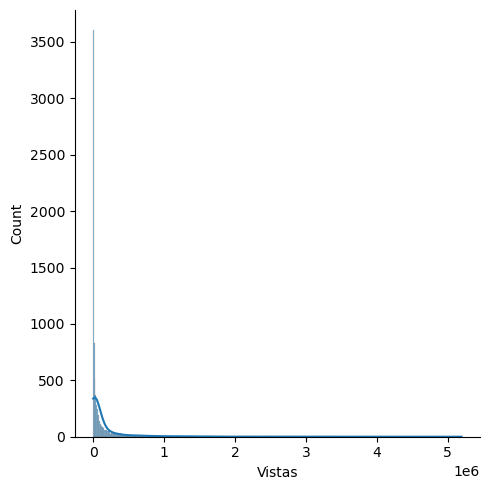

In [58]:
sns.displot(df['Vistas'], kde=True) 
sns.despine() 

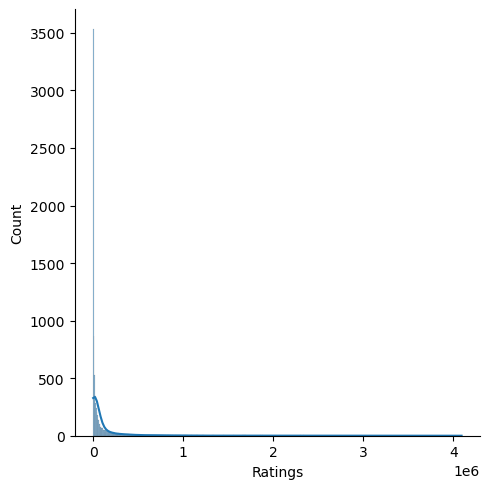

In [59]:
sns.displot(df['Ratings'], kde=True) 
sns.despine() 

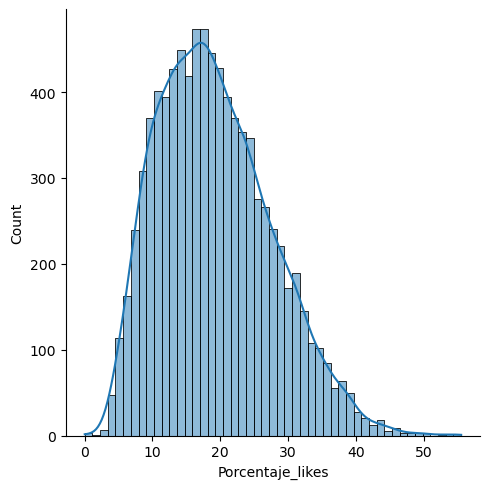

In [60]:
sns.displot(df['Porcentaje_likes'], kde=True) 
sns.despine() 

La columna Vistas, Ratings y Porcentaje_likes presentan sesgo por lo tanto utilizaremos el metodo de rango intercuartilico para detectar outliers

*Vistas*

In [61]:
Q1 = df['Vistas'].quantile(0.25)
Q3 = df['Vistas'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Vistas'] < limite_inferior) | (df['Vistas'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Vistas']])

Cantidad de outliers encontrados: 1254
       Vistas
1     2488721
3     1596190
4      873068
6      283873
7     3014320
...       ...
9933   367484
9934   304029
9967   328284
9968   697663
9978   889283

[1254 rows x 1 columns]


In [62]:
top10 = df.sort_values(by='Vistas', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
265                          Fight Club      David Fincher   
243                        Interstellar  Christopher Nolan   
7554                           Parasite       Bong Joon Ho   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
18                      The Truman Show         Peter Weir   
862                           Inception  Christopher Nolan   
1232                        Ratatouille          Brad Bird   
634                        Forrest Gump    Robert Zemeckis   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
265                    4.27            Drama     139.0      Germany  English   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los valores mas altos de Vistas vemos que no se trata de errores en los registros, ya que hay peliculas que realmente recibieron esas visitas. Analizamos las 10 peliculas mas vistas y observamos que son peliculas que fueron exitosas en los ultimos tiempos, por lo tanto conservaremos esos valores.

*Ratings*

In [63]:
Q1 = df['Ratings'].quantile(0.25)
Q3 = df['Ratings'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Ratings'] < limite_inferior) | (df['Ratings'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Ratings']])

Cantidad de outliers encontrados: 1243
      Ratings
1     1682389
3     1076949
4      600721
6      183927
7     1780203
...       ...
9933   316501
9934   262071
9967   243736
9968   633397
9978   782412

[1243 rows x 1 columns]


In [64]:
top10 = df.sort_values(by='Ratings', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
7554                           Parasite       Bong Joon Ho   
243                        Interstellar  Christopher Nolan   
265                          Fight Club      David Fincher   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
9126  Everything Everywhere All at Once   Daniel Scheinert   
9825                        Oppenheimer  Christopher Nolan   
8943                               Dune   Denis Villeneuve   
21                             Whiplash    Damien Chazelle   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
7554                   4.55           Comedy     133.0  South Korea   Korean   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los outliers de la variable Ratings observamos que son las mismas peliculas que aparecieron con mas Vistas y Likes, por lo tanto también se conservaran estos valores 

*Porcentaje_likes*

In [65]:
Q1 = df['Porcentaje_likes'].quantile(0.25)
Q3 = df['Porcentaje_likes'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Porcentaje_likes'] < limite_inferior) | (df['Porcentaje_likes'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Porcentaje_likes']])

Cantidad de outliers encontrados: 57
      Porcentaje_likes
21           47.094243
80           46.531302
108          43.409498
243          47.909539
265          45.961517
280          44.596920
495          43.990640
587          43.317558
610          45.567265
884          44.253989
1531         43.919918
1791         43.324516
1891         43.684645
1920         45.474817
1923         45.384682
2158         45.144426
2185         52.279308
2577         43.334153
3158         45.359116
4156         42.723896
4218         44.018715
4373         42.630680
4375         44.145659
4399         43.840399
4690         42.492814
4747         43.877945
4871         42.888852
5654         49.241539
5811         43.063306
6024         42.812797
6720         50.358195
6759         45.283019
6985         43.442024
7018         50.000000
7106         43.893014
7332         45.662606
7554         54.452456
7567         47.235237
7673         43.746827
7943         43.589744
8393         43.7650

Cuando analizamos los outliers de la variable Porcentaje_likes observamos que son valores que podria tomar la variable si la pelicula le gusto a mas del 50% del público que la vio. Por lo tanto, se conservarán estos valores. 

**Escalado de variables**

Estandarización (Z-score): Calificación_promedio y Duración (variables con distribución normal)

In [66]:
#Importamos la libreria
from scipy.stats import zscore

In [67]:
#Aplicamos z-score
df['Calificación_promedio_zscore'] = zscore(df['Calificación_promedio'])

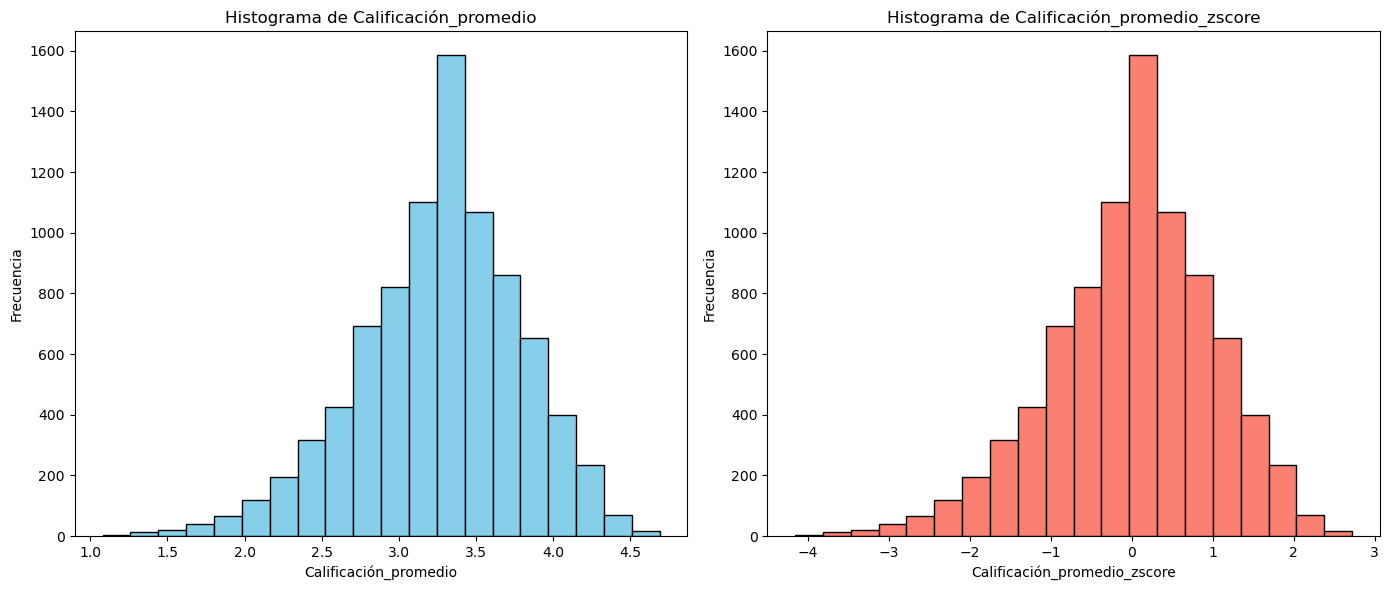

In [68]:
# Visualizamos: Histograma de la columna original y su z-score
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de la columna original
axes[0].hist(df['Calificación_promedio'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Calificación_promedio')
axes[0].set_xlabel('Calificación_promedio')
axes[0].set_ylabel('Frecuencia')

# Histograma de las puntuaciones z
axes[1].hist(df['Calificación_promedio_zscore'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma de Calificación_promedio_zscore')
axes[1].set_xlabel('Calificación_promedio_zscore')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Procedemos de la misma forma con la variable duración

In [69]:
#Aplicamos z-score
df['Duración_zscore'] = zscore(df['Duración'])

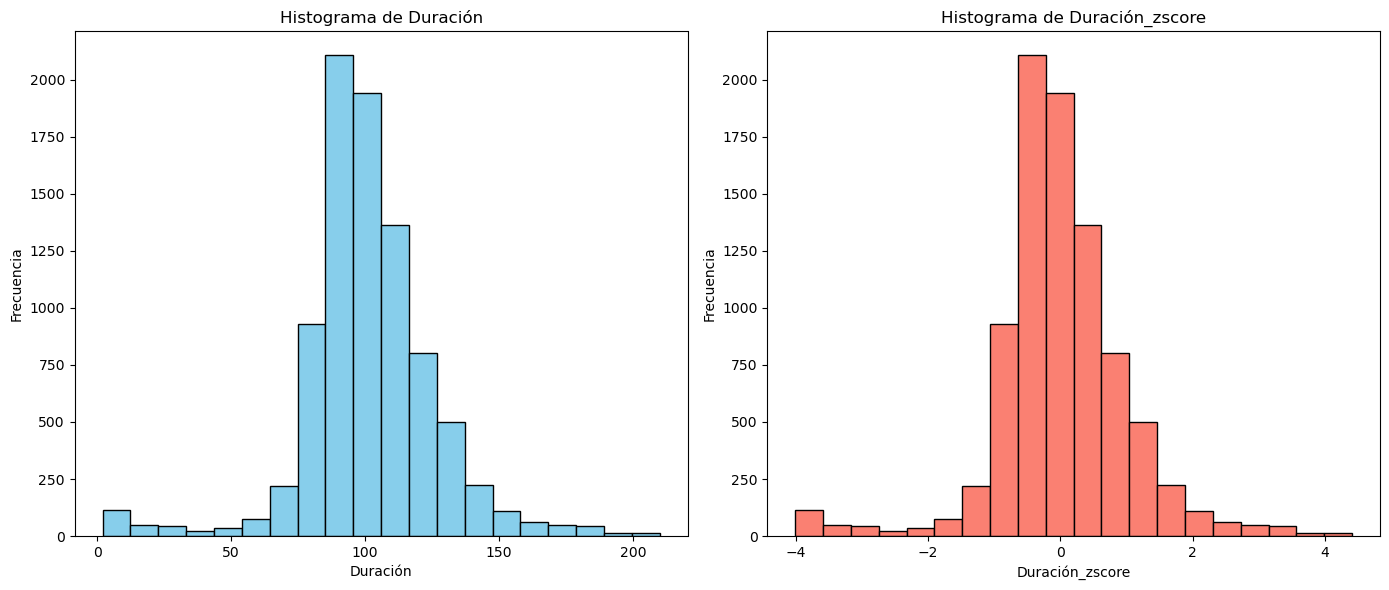

In [70]:
# Visualizamos: Histograma de la columna original y su z-score
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de la columna original
axes[0].hist(df['Duración'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Duración')
axes[0].set_xlabel('Duración')
axes[0].set_ylabel('Frecuencia')

# Histograma de las puntuaciones z
axes[1].hist(df['Duración_zscore'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma de Duración_zscore')
axes[1].set_xlabel('Duración_zscore')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Normalización (Min-Max): Vistas, Ratings, Porcentaje_likes (variables con sesgo)

In [71]:
#Aplicamos la Normalización Min-Max
df['Vistas_normalizadas'] = (df['Vistas'] - df['Vistas'].min()) / (df['Vistas'].max() - df['Vistas'].min())

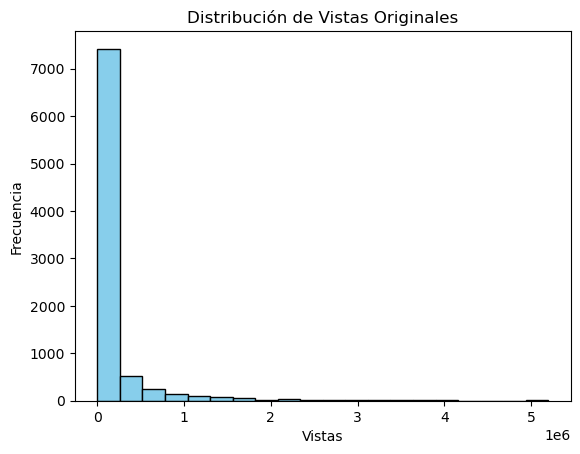

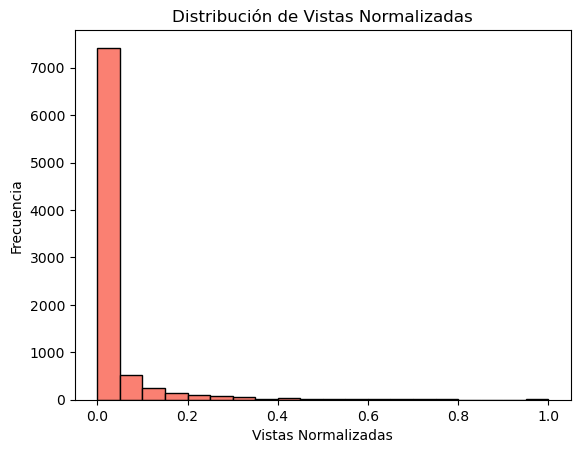

In [72]:
#Histograma de la columna original
plt.hist(df['Vistas'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Vistas Originales')
plt.xlabel('Vistas')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Vistas_normalizadas'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Vistas Normalizadas')
plt.xlabel('Vistas Normalizadas')
plt.ylabel('Frecuencia')
plt.show()

In [73]:
#Aplicamos la Normalización Min-Max
df['Ratings_normalizados'] = (df['Ratings'] - df['Ratings'].min()) / (df['Ratings'].max() - df['Ratings'].min())

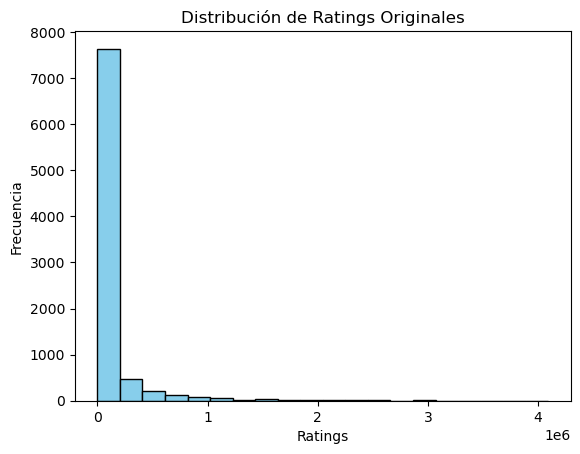

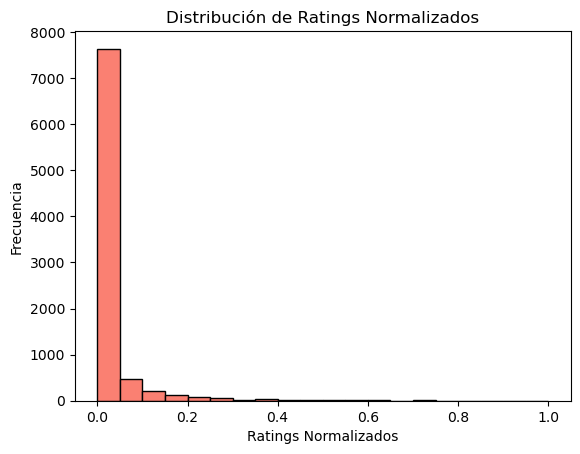

In [74]:
# Histograma de la columna original
plt.hist(df['Ratings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings Originales')
plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Ratings_normalizados'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Ratings Normalizados')
plt.xlabel('Ratings Normalizados')
plt.ylabel('Frecuencia')
plt.show()

In [75]:
#Aplicamos la Normalización Min-Max
df['Porcentaje_likes_normalizado'] = (df['Porcentaje_likes'] - df['Porcentaje_likes'].min()) / (df['Porcentaje_likes'].max() - df['Porcentaje_likes'].min())

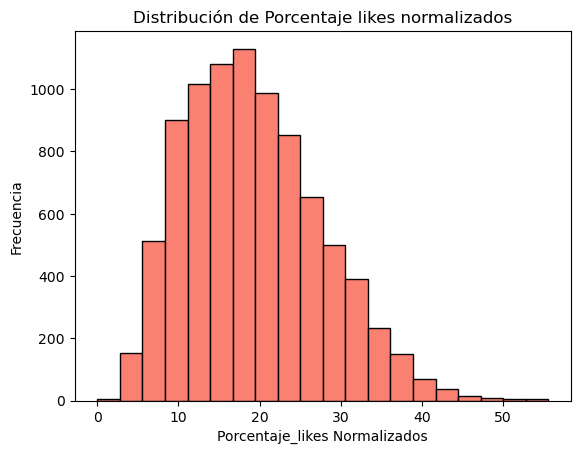

In [76]:
# Histograma de la columna normalizada
plt.hist(df['Porcentaje_likes'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Porcentaje likes normalizados')
plt.xlabel('Porcentaje_likes Normalizados')
plt.ylabel('Frecuencia')
plt.show()

**Analisis exploratorio luego de la estandarización y normalización.**

In [77]:
df.dtypes

Titulo                           object
Director                         object
Calificación_promedio           float64
Genero                           object
Duración                        float64
Pais                             object
Lenguaje                         object
Descripción                      object
Productora                       object
Vistas                            int64
Ratings                           int64
Protagonista                     object
Coprotagonista                   object
Porcentaje_likes                float64
zscore                          float64
is_series                          bool
Calificación_promedio_zscore    float64
Duración_zscore                 float64
Vistas_normalizadas             float64
Ratings_normalizados            float64
Porcentaje_likes_normalizado    float64
dtype: object

Eliminacion de columnas que no utilizaremos para la elaboracion del modelo supervisado. Respecto a las variables numéricas se conservarán las columnas estandarizadas o normalizadas. Las categoricas que son de interes para nuestro analisis serán exploradas y transformadas con Get Dummies a continuación.

In [78]:
df = df.drop(columns=['Titulo' , 'Calificación_promedio' , 'Duración' , 'Descripción' , 'Vistas' , 'Ratings' , 'Porcentaje_likes' , 'zscore' , 'is_series'])

In [79]:
df.dtypes

Director                         object
Genero                           object
Pais                             object
Lenguaje                         object
Productora                       object
Protagonista                     object
Coprotagonista                   object
Calificación_promedio_zscore    float64
Duración_zscore                 float64
Vistas_normalizadas             float64
Ratings_normalizados            float64
Porcentaje_likes_normalizado    float64
dtype: object

Cambiamos los nombres de las columnas normalizadas y estandarizadas

In [80]:
df = df.rename(columns={'Calificación_promedio_zscore' : 'Calificación' , 'Duración_zscore' : 'Duración', 'Vistas_normalizadas' : 'Vistas' , 'Ratings_normalizados' : 'Ratings' , 'Porcentaje_likes_normalizado' : 'Porcentaje_likes'})
print(df.columns)

Index(['Director', 'Genero', 'Pais', 'Lenguaje', 'Productora', 'Protagonista',
       'Coprotagonista', 'Calificación', 'Duración', 'Vistas', 'Ratings',
       'Porcentaje_likes'],
      dtype='object')


**Transformacion de datos categóricos One Hot Encoding**

Debido a que las variables a transformar son categóricas y no tienen un orden predeterminado utilizaremos OneHotEncoding

In [81]:
# Especificamos las columnas categóricas que necesitamos transformar
columnas_categoricas = ['Director', 'Genero' , 'Pais' , 'Lenguaje', 'Productora', 'Protagonista' , 'Coprotagonista']  

# Aplicamos One Hot Encoding
df = pd.get_dummies(df, columns=columnas_categoricas)

# Vemos los resultados aplicados a las primeras filas 
print(df.head())

# Guardardamos el nuevo DataFrame a CSV
df.to_csv("Movie_Data_File_Codificado.csv", index=False)

   Calificación  Duración    Vistas   Ratings  Porcentaje_likes  Director_  \
0      0.586997 -0.364805  0.002471  0.002210          0.527482      False   
1      1.750081  0.808617  0.479014  0.411238          0.670854      False   
3      1.006470  0.039823  0.307225  0.263246          0.556229      False   
4      1.940750  0.930005  0.168043  0.146838          0.704207      False   
6      0.873001 -0.041102  0.054638  0.044959          0.543970      False   

   Director_A.V. Rockwell  Director_Aaron B. Koontz  Director_Aaron Blaise  \
0                   False                     False                  False   
1                   False                     False                  False   
3                   False                     False                  False   
4                   False                     False                  False   
6                   False                     False                  False   

   Director_Aaron Hann  ...  Coprotagonista_Zoë Kravitz  \
0  

**Aprendizaje supervisado**

In [82]:
df = pd.read_csv('Movie_Data_File_Codificado.csv')

Utilizaremos Calificación como target. Debido a que Calificación es una variable numérica continua utilizaremos modelos de aprendizaje supervisado de regresión.

*Arbol de decisión*

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
#Definimos la variable target y los features
y = df['Calificación']  # variable a predecir
X = df.drop(columns=['Calificación'])  # el resto son variables predictoras, otra opción X = df.drop("target", axis=1)

In [85]:
#Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
#Creamos y entrenamos el modelo de árbol de decisión. Utilizamos regresión por ser la variable a predecir de tipo numerica .
modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [87]:
#Hacemos predicciones
y_pred = modelo.predict(X_test)

In [88]:
#Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 0.30
RMSE: 0.55
R² Score: 0.69


El error cuadrático promedio (MSE) es de 0.30, lo utilizaremos a continuación para comparar modelo. La raíz cuadrada del MSE (RMSE) de 0.55 significa que, en promedio, el modelo comete un error de 0.55 unidades. Un R² de 0.69 significa que el árbol de decisión explica el 69% de la variabilidad de los datos.

Ajustamos algunos hiperparametros al modelo y lo volevmos a ejecutar.

Debido a que tenemos gran numero de datos, para optimizar hiperparámetros utilizaremos *RandomizedSearchCV* en vez de GridSearchCV
ya que, en vez de probar todas las combinaciones posibles, prueba un número aleatorio limitado. 

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [90]:
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['squared_error', 'absolute_error']
}

modelo = DecisionTreeRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=15,  # Solo 15 combinaciones en lugar de probar todas
    scoring='neg_root_mean_squared_error',
    cv=3,       # Usá menos folds para acelerar más
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", random_search.best_params_)

Mejores parámetros encontrados: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 10}


In [91]:
#Definimos la variable target y los features
y = df['Calificación']  # variable a predecir
X = df.drop(columns=['Calificación'])  # el resto son variables predictoras

In [92]:
#Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cambiar según resultados de mejor combinación de parámetros

In [94]:
#Creamos y entrenamos el modelo de árbol de decisión con la mejor combinación de hiperparámetros
mejor_modelo = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=10,
    min_samples_leaf=7,
    min_samples_split=10,
    random_state=42
)
mejor_modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=7, min_samples_split=10,
                      random_state=42)

In [95]:
#Hacemos las predicciones
y_pred = mejor_modelo.predict(X_test)

In [96]:
#Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 0.25
RMSE: 0.50
R² Score: 0.75


MSE: 0.25. El error cuadrático medio disminuyó de 0.30 a 0.25. Esto indica que el modelo mejoró y está cometiendo menos error al predecir.

RMSE: 0.50. La raíz cuadrada del error también bajó, de 0.55 a 0.50, significa que en promedio el modelo se equivoca en medio punto en la escala de la variable objetivo.

R² Score: 0.75. El coeficiente de determinación subió de 0.69 a 0.75. Esto significa que el modelo ahora explica el 75% de la variabilidad de los datos. 

In [98]:
from sklearn.tree import plot_tree

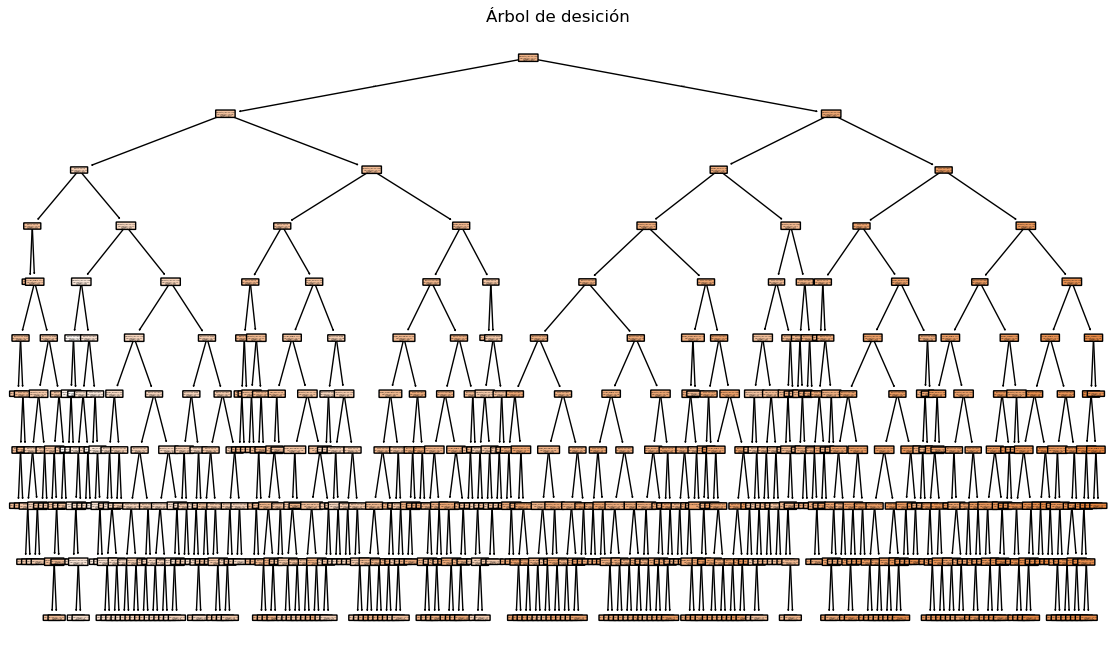

In [99]:
#Visualizamos el árbol 
plt.figure(figsize=(14, 8))
plot_tree(mejor_modelo, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de desición")
plt.show()

In [101]:
#Entrenamos el modelo final con todos los datos de entrenamiento
mejor_modelo = random_search.best_estimator_
mejor_modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=7, min_samples_split=10,
                      random_state=42)

In [103]:
# Realizamos la evaluación final sobre el conjunto de prueba (X_test)
y_pred = mejor_modelo.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE final: {rmse:.2f}")
print(f"R² final: {r2:.2f}")

RMSE final: 0.50
R² final: 0.75


RMSE final: 0.50. El modelo se equivoca en 0.5 unidades de la variable objetivo cuando predice sobre datos nuevos (de prueba). Eso indica un error relativamente bajo.
R² final: 0.75. El modelo explica el 75% de la variabilidad real de la variable objetivo en datos que nunca vio. Esto es una señal sólida de que el modelo generaliza bien.

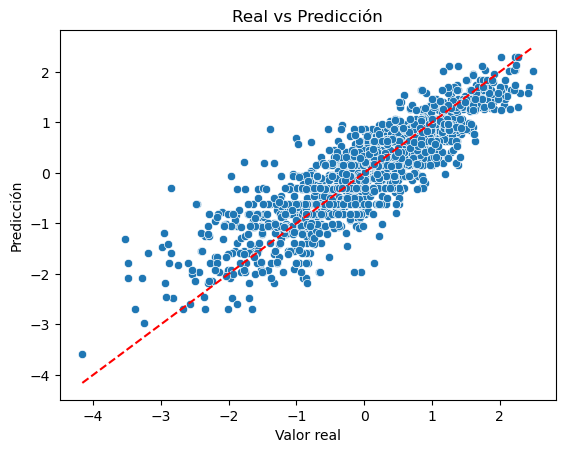

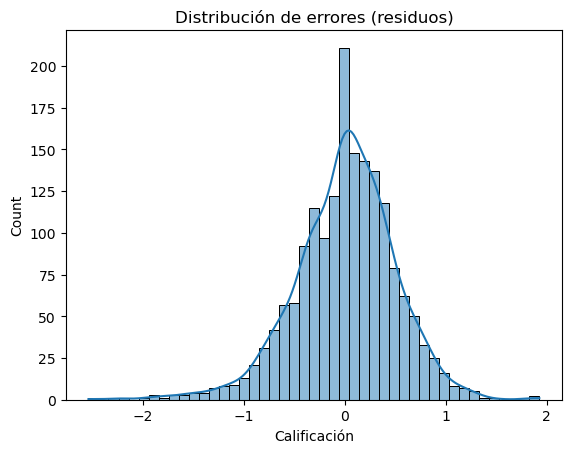

In [104]:
#Visualización de errores y predicciones
# Comparamos real vs predicho
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Real vs Predicción")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Distribución del error
errores = y_test - y_pred
sns.histplot(errores, kde=True)
plt.title("Distribución de errores (residuos)")
plt.show()

En el gráfico de valores reales vs predicho los puntos se encuentran alineados cerca de la diagonal.
Los errores tienen distribución normal y significa que:
La mayoría de los errores son pequeños y se agrupan cerca de cero.
Hay una simetría: errores grandes positivos y negativos son raros y ocurren con igual probabilidad.
No hay sesgos sistemáticos: el modelo no tiende a sobrestimar o subestimar consistentemente.

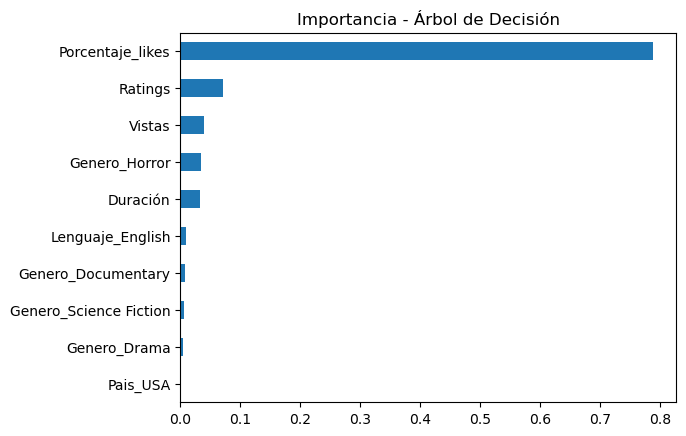

In [105]:
# Visualizamos la importancia de las variables 
importancia_arbol = pd.Series(mejor_modelo.feature_importances_, index=X.columns)
importancia_arbol.sort_values(ascending=True).tail(10).plot(kind='barh', title="Importancia - Árbol de Decisión")
plt.show()

En el gráfico observamos cuales son las variables que dominan en el modelo teniendo en cuenta la variable objetivo, 'Calificaicón'

In [106]:
#Guardamos el modelo 
import joblib
joblib.dump(mejor_modelo, "modelo_final.pkl")

['modelo_final.pkl']

*Random Forest*

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression

In [108]:
# Separamos features y target
X = df.drop(columns=['Calificación'])
y = df['Calificación']

In [109]:
#Dividimos train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
#Creamos y entrenamos el modelo
modelo_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    random_state=42,
    n_jobs=-1 
)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=42)

In [111]:
# Ejecutamos las predicciones
y_pred = modelo_rf.predict(X_test)

In [112]:
# Aplicamos las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [113]:
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

MSE:  0.2174
RMSE: 0.4662
R²:   0.7789


El MSE bajó respecto al árbol de decisión simple, lo que indica que el error cuadrático medio es menor, es decir, predicciones más precisas en promedio. El RMSE de 0.47 significa que el error promedio en las unidades de la variable objetivo es menor que el anterior (0.50), mejorando la precisión.
El R² de 0.78 indica que el modelo explica el 78% de la varianza, un poco más que el árbol de decisión, lo que significa mejor capacidad predictiva y generalización.

Realizaremos el ajuste de los hiperparámetros con *RandomizedSearchCV*

In [120]:
#Rango de parámetros
param_dist = {
    'n_estimators': randint(50, 200),         # Cantidad de árboles
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000179806ADDF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000179806AC860>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001798069F170>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [122]:
#Evaluación del mejor modelo
mejor_rf = random_search_rf.best_estimator_
y_pred_mejor_rf = mejor_rf.predict(X_test)
print("Random Forest Ajustado:")
print("Mejores parámetros:", random_search_rf.best_params_)

Random Forest Ajustado:
Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 122}


In [125]:
#Creamos y entrenamos el modelo
mejor_rf = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=6,
    n_estimators=122,
    random_state=42  # Para reproducibilidad
) 

mejor_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=122, random_state=42)

In [127]:
#Análisis de las métricas
mse_mejor = mean_squared_error(y_test, y_pred_mejor_rf)
rmse_mejor = np.sqrt(mse_mejor) 
r2_mejor = r2_score(y_test, y_pred_mejor_rf)

print(f"MSE:  {mse_mejor:.4f}")
print(f"RMSE: {rmse_mejor:.4f}")
print(f"R²:   {r2_mejor:.4f}")

MSE:  0.6564
RMSE: 0.8102
R²:   0.3322


Aumentamos las iteraciones (n_iter)

In [128]:
#Rango de parámetros
param_dist = {
    'n_estimators': randint(50, 200),         # Cantidad de árboles
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017981F466C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017981F45DC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017980EC4B00>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [129]:
#Evaluación del mejor modelo
mejor_rf = random_search_rf.best_estimator_
y_pred_mejor_rf = mejor_rf.predict(X_test)
print("Random Forest Ajustado:")
print("Mejores parámetros:", random_search_rf.best_params_)

Random Forest Ajustado:
Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 94}


In [130]:
# Crear el modelo con los mejores hiperparámetros encontrados
mejor_rf = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=8,
    n_estimators=94,
    random_state=42,
    n_jobs=-1  # Para usar todos los núcleos del procesador
)

# Entrenar el modelo
mejor_rf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_mejor_rf = mejor_rf.predict(X_test)

In [131]:
#Análisis de las métricas
mse_mejor = mean_squared_error(y_test, y_pred_mejor_rf)
rmse_mejor = np.sqrt(mse_mejor) 
r2_mejor = r2_score(y_test, y_pred_mejor_rf)

print(f"MSE:  {mse_mejor:.4f}")
print(f"RMSE: {rmse_mejor:.4f}")
print(f"R²:   {r2_mejor:.4f}")

MSE:  0.3225
RMSE: 0.5679
R²:   0.6719


Debido a que este último modelo fue mejor que el anterior realizaremos una busqueda de hiperparametros óptimos cercana a esos valores

In [132]:
#Definimos un nuevo espacio de búsqueda fino
param_dist_fino = {
    'n_estimators': randint(80, 110),             # cerca de 94
    'max_depth': [None, 8, 10, 12],                # alrededor del default
    'min_samples_split': randint(6, 10),           # alrededor de 8
    'min_samples_leaf': randint(1, 3),             # 1 o 2
    'max_features': ['sqrt']                       # ya vimos que 'sqrt' funciona mejor
}

In [133]:
#Configuramos la busqueda
rf = RandomForestRegressor(random_state=42)

random_search_fina = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_fino,
    n_iter=30,                  # aumentamos iteraciones
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=1
)

# Ejecutamos la búsqueda
random_search_fina.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 8, 10, 12],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017981F47C80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017980F75DC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017981923140>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [134]:
#Extraemos y ejecutamos el mejor modelo
mejor_rf_fino = random_search_fina.best_estimator_
y_pred_fino = mejor_rf_fino.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_fino)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_fino)

print("Mejores parámetros:", random_search_fina.best_params_)
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 97}
MSE:  0.3244
RMSE: 0.5696
R²:   0.6700


La búsqueda más fina no mejoró significativamente el rendimiento, pero confirmó que es en una zona estable del espacio de hiperparámetros.
El modelo ya está bien ajustado y no es necesario seguir haciendo ajustes finos. De todas formas el Random forest por defecto fue el que dio como resultado las mejores métricas. Por lo tanto continuaremos el análisis sobre dicho modelo.

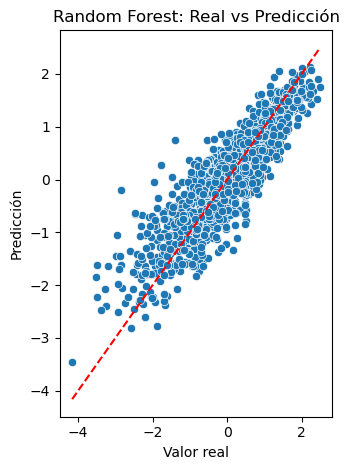

In [135]:
#Gráficamos para comparar valores reales vs predichos
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=modelo_rf.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Random Forest: Real vs Predicción")

plt.tight_layout()
plt.show()

Se observa una distribución lineal de los valores reales vs predichos

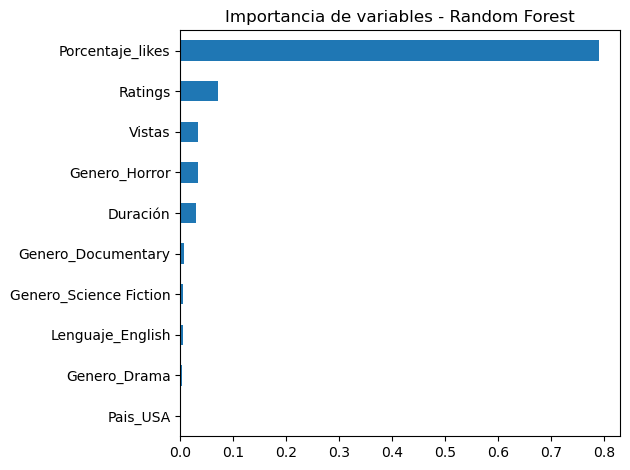

In [136]:
# Importancia de las variables
importancias_rf = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancias_rf.sort_values().tail(10).plot(kind='barh')
plt.title("Importancia de variables - Random Forest")
plt.tight_layout()
plt.show()

In [137]:
#Guardamos el modelo
import joblib
joblib.dump(modelo_rf, "modelo_random_forest.pkl")

['modelo_random_forest.pkl']

In [109]:
from sklearn.tree import plot_tree

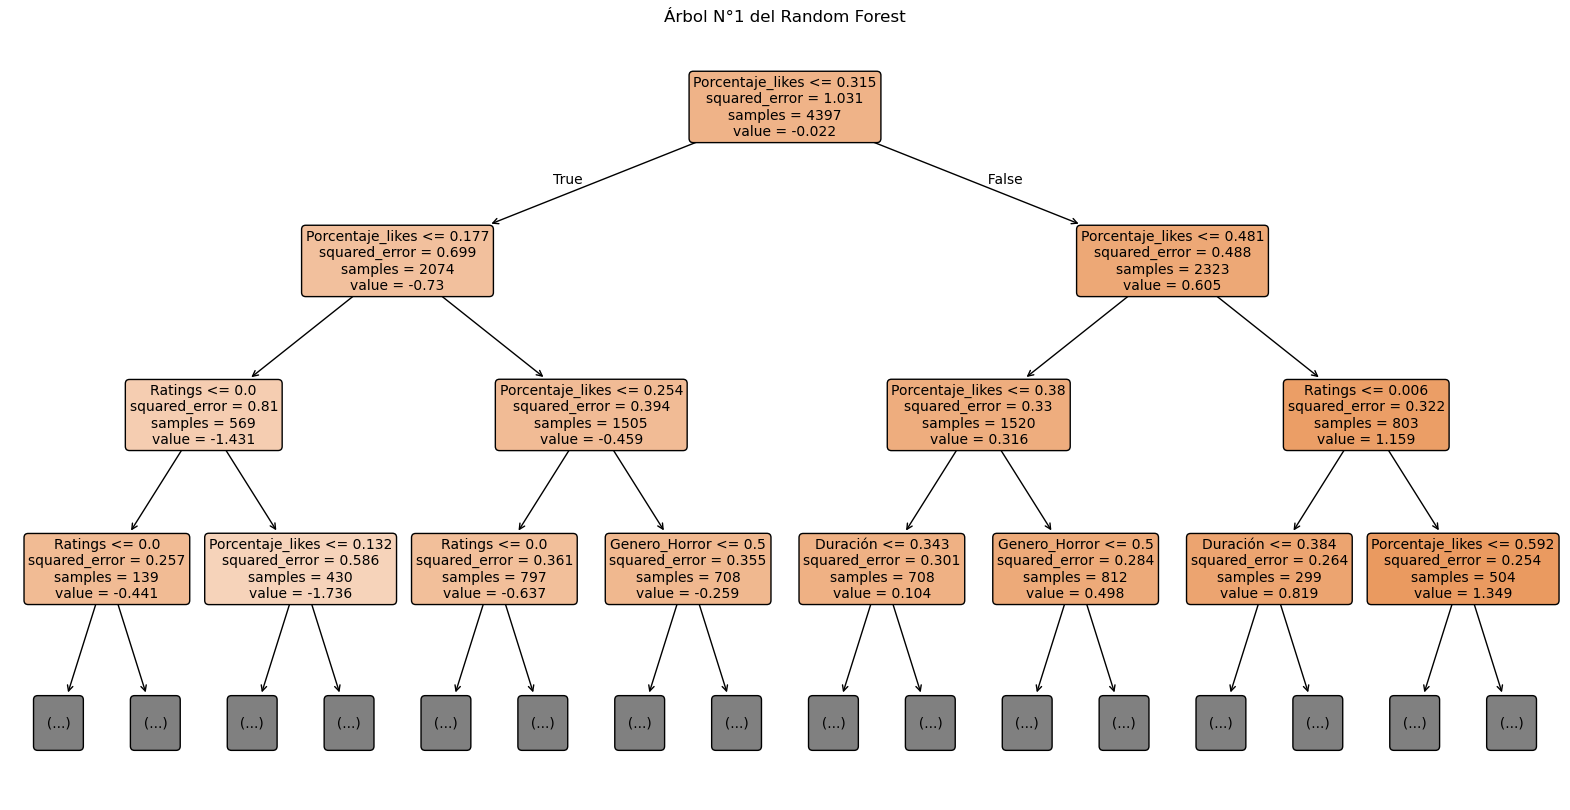

In [138]:
#Elegimos el primer árbol del bosque entrenado
arbol = modelo_rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(arbol, 
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=3,     
          fontsize=10)
plt.title("Árbol N°1 del Random Forest")
plt.show()

El porcentaje de likes sobre el total de vistas es la variable más importante para predecir la calificación, seguido por el Ratings y las vistas. Debido a la transformación de la variable género el modelo ahora ve cada género como una variable diferente, y calcula su importancia individual. Por lo tanto, observamos que el género Horror es el que mas impacta en la variable Calificación. La duración es otra variable importante en la definición de la clasificación. La variable Lenguaje en Ingles tambien impacta en la calificación.

*Comparación de Árbol de decisión optimizado y Random Forest por defecto*

In [140]:
# Árbol de decisión optimizado
y_pred_mejor_modelo = mejor_modelo.predict(X_test)
rmse_mejor_modelo = np.sqrt(mean_squared_error(y_test, y_pred_mejor_modelo))
r2_mejor_modelo = r2_score(y_test, y_pred_mejor_modelo)

# Random Forest por defecto
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Comparación
comparacion = pd.DataFrame({
    "Modelo": ["mejor_modelo (Árbol)", "modelo_rf (Random Forest)"],
    "RMSE": [rmse_mejor_modelo, rmse_rf],
    "R²": [r2_mejor_modelo, r2_rf]
})

print("Comparación de modelos:")
print(comparacion)

Comparación de modelos:
                      Modelo      RMSE        R²
0       mejor_modelo (Árbol)  0.499528  0.746152
1  modelo_rf (Random Forest)  0.434376  0.808051


Definitivamente el modelo que mejor ajusta es el Random forest por defecto

*Utilización de Cross_validation sobre el mejor modelo*

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [143]:
# Definimos RMSE como métrica para cross_val_score (signo negativo porque sklearn maximiza)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Cross-validation sobre el conjunto de entrenamiento
scores = cross_val_score(modelo_rf, X_train, y_train, scoring=rmse_scorer, cv=5, n_jobs=-1)

print(f"RMSE promedio (CV) sobre entrenamiento: {-scores.mean():.3f}")
print(f"Desviación estándar RMSE (CV) sobre entrenamiento: {scores.std():.3f}")


RMSE promedio (CV) sobre entrenamiento: 0.427
Desviación estándar RMSE (CV) sobre entrenamiento: 0.008


El valor de RMSE promedio es bajo (0.427) significa que el modelo tiene un muy buen desempeño promedio durante la validación cruzada.
El valos de la desviación estándar es muy baja (0.008). El rendimiento del modelo es altamente estable entre los distintos folds. Esto significa que no depende de un subconjunto particular de los datos para rendir bien.

*Curva de aprendizaje para comprobar que el modelo generaliza bien o detectar overfitting*

In [144]:
from sklearn.model_selection import learning_curve

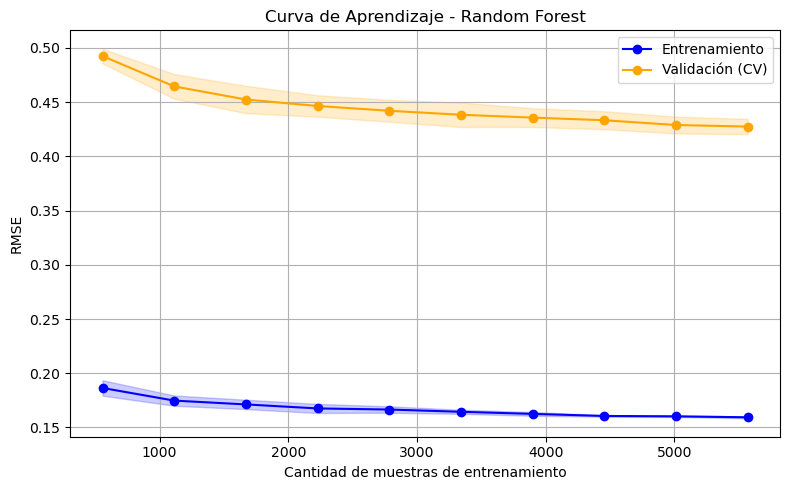

In [146]:
# Elegimos el modelo 
modelo = modelo_rf  

train_sizes, train_scores, val_scores = learning_curve(
    estimator=modelo,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calculamos medias y desvíos
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = -val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='orange', label='Validación (CV)')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='orange')

plt.title("Curva de Aprendizaje - Random Forest")
plt.xlabel("Cantidad de muestras de entrenamiento")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

Esto significa que el modelo aprende bien sobre los datos de entrenamiento (RMSE bajo). Pero tiene un error sistemáticamente mayor en validación.
que se observa en la diferencia de 0.3 en RMSE es moderada. 

*Comparación con Regresión Lineal*

In [151]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
   
y_pred_lr = modelo_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal")
print(f"MSE:  {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R²:   {r2_lr:.4f}")


Regresión Lineal
MSE:  0.9488
RMSE: 0.9741
R²:   0.0348


La regresión lineal presenta un rendimiento menor al Random Forest (mayor error, menor R²). Esto indica que la relación entre las variables predictoras y la variable objetivo no es lineal, por lo que un modelo más flexible como Random Forest logra capturar mejor la complejidad y las interacciones presentes en los datos.

**Conclusión**
  El modelo Random Forest mostro tener el mejor desempeño para predecir la calificación promedio de una película, superando tanto al árbol de decisión como a la regresión lineal. Esto confirma que la relación entre las variables y la calificación no es lineal y que un modelo más flexible puede capturar mejor la complejidad del comportamiento de la audiencia. Cuando se ajustaron parametros con RandomizedSearchCV, si bien el modelo presentó buen ajuste no supero al Random Forest por defecto

 La validación cruzada confirma que los resultados son estables en distintos subconjuntos de datos, lo que sugiere buena capacidad de generalización.

 Las variables más importantes para predecir la calificación son:

Porcentaje de likes

Ratings

Género (especialmente Horror)

Duración

Idioma (inglés)

El modelo tiene un buen equilibrio entre sesgo y varianza, como lo muestra la curva de aprendizaje, lo que podría beneficiarse de más datos para mejorar aún más su rendimiento.

  En resumen, esta metodología permite ofrecer una herramienta práctica para que los usuarios puedan recibir recomendaciones personalizadas basadas en características objetivas y predictivas de las películas. Además, puede ser adaptada fácilmente para trabajar con nuevos conjuntos de datos o para tareas de clasificación, ampliando su utilidad en el dominio audiovisual.